# Stock Prediction(Task-1)

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [2]:
# Load the stock data
ticker = "TCS.NS"
TCS = yf.download(ticker, period="10y", actions=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Use only the 'Close' prices for prediction
data = TCS[['Close']].values

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# Split data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [6]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((seq, target))
    return sequences

seq_length = 10  # You can adjust this
train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)

In [7]:
# Convert sequences to numpy arrays
X_train = np.array([seq for seq, _ in train_sequences])
y_train = np.array([target for _, target in train_sequences])
X_test = np.array([seq for seq, _ in test_sequences])
y_test = np.array([target for _, target in test_sequences])

In [8]:
# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
123/123 [==============================] - 1s 3ms/step - loss: 0.0140
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 2.3685e-04
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 2.3465e-04
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 2.2667e-04
Epoch 5/50
123/123 [==============================] - 0s 3ms/step - loss: 2.1394e-04
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 2.1971e-04
Epoch 7/50
123/123 [==============================] - 1s 4ms/step - loss: 2.1099e-04
Epoch 8/50
123/123 [==============================] - 1s 4ms/step - loss: 2.0161e-04
Epoch 9/50
123/123 [==============================] - 1s 4ms/step - loss: 2.0060e-04
Epoch 10/50
123/123 [==============================] - 1s 4ms/step - loss: 1.9832e-04
Epoch 11/50
123/123 [==============================] - 0s 4ms/step - loss: 2.3028e-04
Epoch 12/50
123/123 [==============================] - 0s 4ms/step 

In [9]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

In [10]:
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Train Loss: 0.0001
Test Loss: 0.0005


In [11]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [12]:
# Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

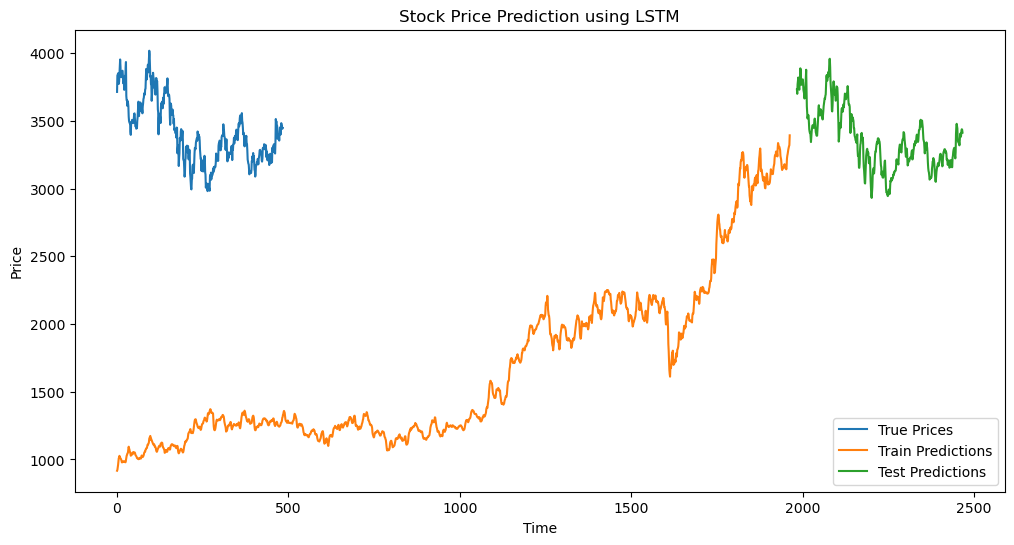

In [13]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(data[train_size + seq_length:], label='True Prices')
plt.plot(train_predictions, label='Train Predictions')
plt.plot(range(train_size + seq_length, len(data)), test_predictions, label='Test Predictions')
plt.legend()
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [14]:
# Conclusion and Future Work
print("Conclusion and Future Work:")
print("In this project, we successfully implemented an LSTM-based stock price prediction model.")
print("We demonstrated the entire process from data collection, preprocessing, model building, training, evaluation, to visualization.")
print("The project serves as a foundation for further exploration and enhancement:")
print("- Hyperparameter Tuning: Experiment with different LSTM architectures and batch sizes.")
print("- Feature Engineering: Incorporate additional features like technical indicators and external factors.")
print("- Ensemble Methods: Explore combining multiple LSTM models for improved accuracy.")
print("- Real-Time Prediction: Implement a pipeline for predicting stock prices as new data arrives.")
print("- Deployment: Deploy the trained model as a web app or API for wider usage.")
print("By expanding on these aspects, we can gain deeper insights into stock price prediction and contribute to the field of finance.")

Conclusion and Future Work:
In this project, we successfully implemented an LSTM-based stock price prediction model.
We demonstrated the entire process from data collection, preprocessing, model building, training, evaluation, to visualization.
The project serves as a foundation for further exploration and enhancement:
- Hyperparameter Tuning: Experiment with different LSTM architectures and batch sizes.
- Feature Engineering: Incorporate additional features like technical indicators and external factors.
- Ensemble Methods: Explore combining multiple LSTM models for improved accuracy.
- Real-Time Prediction: Implement a pipeline for predicting stock prices as new data arrives.
- Deployment: Deploy the trained model as a web app or API for wider usage.
By expanding on these aspects, we can gain deeper insights into stock price prediction and contribute to the field of finance.
